**Load data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from numpy.random import RandomState

data_path="/content/drive/MyDrive/DACN_ATTT/Dataset/"
df_normal = pd.read_csv(data_path + "normal_data.csv",  encoding = 'utf8')
df_normal = df_normal[:37500]
df_normal = df_normal.drop(['Class'], axis=1)
df_anomalous = pd.read_csv(data_path + "anomalous_data.csv",  encoding = 'utf8')
df_anomalous = df_anomalous[:37500]
df_anomalous = df_anomalous.drop(['Class'], axis=1)

df_normal["y"]=0
df_anomalous["y"]=1

print(df_normal.shape)
print(df_anomalous.shape)

(37500, 9)
(37500, 9)


**Data Processing**

In [3]:
data = pd.concat([df_normal, df_anomalous], axis =0 )
data = data.sample(frac = 1)
data.reset_index(inplace = True)
data.drop(["index"], axis = 1, inplace = True)
data = data.dropna(axis=1, how='any')
data

,Len_of_rq,Len_of_argu,Num_of_argu,Num_of_digit_in_argu,Len_of_path,Num_of_let_in_argu,Num_of_let_char_in_path,Num_of_spea_char_in_path,y
0,230,2,0,0,39,0,30,0,0
1,477,257,13,43,286,166,189,7,1
2,254,34,1,0,62,31,53,0,0
3,212,2,0,0,21,0,14,0,0
4,223,2,0,0,32,0,24,0,0
...,...,...,...,...,...,...,...,...,...
74995,538,317,13,51,346,199,222,12,1
74996,217,2,0,0,26,0,17,0,0
74997,220,2,0,0,29,0,21,0,0
74998,255,35,1,0,63,32,54,0,1


In [4]:
y = data['y']
X = data.drop(['y'], axis=1)

# y_unsup=df_normal['y']
# X_unsup=df_normal.drop(['y'], axis=1)

**Scaling Data**

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# X_unsup = pd.DataFrame(scaler.fit_transform(X_unsup), columns=X_unsup.columns)
X

,Len_of_rq,Len_of_argu,Num_of_argu,Num_of_digit_in_argu,Len_of_path,Num_of_let_in_argu,Num_of_let_char_in_path,Num_of_spea_char_in_path
0,0.172656,0.000000,0.000000,0.000000,0.035787,0.000000,0.062112,0.000000
1,0.389132,0.268139,0.764706,0.098398,0.288344,0.457300,0.391304,0.061404
2,0.193690,0.033649,0.058824,0.000000,0.059305,0.085399,0.109731,0.000000
3,0.156880,0.000000,0.000000,0.000000,0.017382,0.000000,0.028986,0.000000
4,0.166521,0.000000,0.000000,0.000000,0.028630,0.000000,0.049689,0.000000
...,...,...,...,...,...,...,...,...
74995,0.442594,0.331230,0.764706,0.116705,0.349693,0.548209,0.459627,0.105263
74996,0.161262,0.000000,0.000000,0.000000,0.022495,0.000000,0.035197,0.000000
74997,0.163891,0.000000,0.000000,0.000000,0.025562,0.000000,0.043478,0.000000
74998,0.194566,0.034700,0.058824,0.000000,0.060327,0.088154,0.111801,0.000000


**Train Test Split**

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
# X_train_unsup, X_test_unsup, y_train_unsup, y_test_unsup = train_test_split(X_unsup, y_unsup, test_size = 0.1, random_state = 0)

X_train.shape, X_test.shape


(m, d) = X_train.shape
(m, d)

(67500, 8)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 0)
X_train.shape, X_val.shape

((60750, 8), (6750, 8))

In [ ]:
X_train

,Len_of_rq,Len_of_argu,Num_of_argu,Num_of_digit_in_argu,Len_of_path,Num_of_let_in_argu,Num_of_let_char_in_path,Num_of_spea_char_in_path
74837,0.163891,0.000000,0.000000,0.000000,0.025562,0.000000,0.043478,0.000000
48671,0.400526,0.280757,0.764706,0.096110,0.301636,0.498623,0.424431,0.043860
60702,0.193690,0.034700,0.058824,0.000000,0.060327,0.088154,0.111801,0.000000
36189,0.177038,0.004206,0.058824,0.002288,0.039877,0.008264,0.070393,0.000000
34401,0.164768,0.000000,0.000000,0.000000,0.026585,0.000000,0.045549,0.000000
...,...,...,...,...,...,...,...,...
5963,0.580193,0.468980,0.764706,0.254005,0.513292,0.564738,0.517598,0.324561
24568,0.165644,0.000000,0.000000,0.000000,0.027607,0.000000,0.047619,0.000000
7720,0.237511,0.083070,0.294118,0.022883,0.111452,0.143251,0.161491,0.026316
46418,0.173532,0.010515,0.058824,0.011442,0.036810,0.002755,0.047619,0.008772


In [ ]:
X_test

,Len_of_rq,Len_of_argu,Num_of_argu,Num_of_digit_in_argu,Len_of_path,Num_of_let_in_argu,Num_of_let_char_in_path,Num_of_spea_char_in_path
69870,0.165644,0.000000,0.000000,0.000000,0.027607,0.000000,0.047619,0.000000
67768,0.167397,0.000000,0.000000,0.000000,0.029652,0.000000,0.051760,0.000000
36749,0.164768,0.000000,0.000000,0.000000,0.026585,0.000000,0.045549,0.000000
16324,0.191937,0.005258,0.058824,0.000000,0.054192,0.011019,0.051760,0.000000
23085,0.175285,0.003155,0.058824,0.002288,0.038855,0.005510,0.068323,0.000000
...,...,...,...,...,...,...,...,...
12673,0.161262,0.000000,0.000000,0.000000,0.022495,0.000000,0.035197,0.000000
35356,0.410167,0.292324,0.764706,0.082380,0.311861,0.559229,0.467909,0.008772
41654,0.179667,0.016824,0.058824,0.002288,0.042945,0.038567,0.074534,0.000000
60824,0.167397,0.000000,0.000000,0.000000,0.029652,0.000000,0.051760,0.000000


In [ ]:
X_val

,Len_of_rq,Len_of_argu,Num_of_argu,Num_of_digit_in_argu,Len_of_path,Num_of_let_in_argu,Num_of_let_char_in_path,Num_of_spea_char_in_path
59253,0.178791,0.016824,0.058824,0.002288,0.042945,0.038567,0.074534,0.000000
66924,0.164768,0.000000,0.000000,0.000000,0.026585,0.000000,0.045549,0.000000
45636,0.048203,0.005258,0.058824,0.000000,0.048057,0.011019,0.051760,0.000000
29791,0.272568,0.124080,0.294118,0.075515,0.151329,0.176309,0.186335,0.043860
22794,0.127958,0.000000,0.000000,0.000000,0.084867,0.000000,0.149068,0.000000
...,...,...,...,...,...,...,...,...
54376,0.070114,0.005258,0.058824,0.000000,0.052147,0.011019,0.051760,0.000000
69997,0.414549,0.358570,0.705882,0.109840,0.378323,0.608815,0.511387,0.122807
12510,0.363716,0.172450,0.470588,0.059497,0.305726,0.283747,0.430642,0.061404
24159,0.228747,0.076761,0.294118,0.018307,0.101227,0.132231,0.144928,0.017544


**Check data**

In [8]:
ano_count=0
nor_count=0
for i in y_val:
  if(i==0):
    nor_count+=1
  else:
    ano_count+=1
print(ano_count," ",nor_count)

# print(y_test)

3377   3373


**Building Fully connected model**



In [9]:
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
import tensorflow as tf

In [10]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

print(mean_px)
print(std_px)

def standardize(x): 
    return (x-mean_px)/std_px

Len_of_rq                   0.237036
Len_of_argu                 0.092817
Num_of_argu                 0.229209
Num_of_digit_in_argu        0.033107
Len_of_path                 0.128358
Num_of_let_in_argu          0.154092
Num_of_let_char_in_path     0.178671
Num_of_spea_char_in_path    0.027492
dtype: float32
Len_of_rq                   0.100871
Len_of_argu                 0.122009
Num_of_argu                 0.281234
Num_of_digit_in_argu        0.060649
Len_of_path                 0.131009
Num_of_let_in_argu          0.196015
Num_of_let_char_in_path     0.167343
Num_of_spea_char_in_path    0.066481
dtype: float32


In [11]:
model_DL = Sequential()
model_DL.add(Lambda(standardize, input_shape=(d,)))
model_DL.add(Dense(128, activation='softmax'))
model_DL.add(Dropout(0.3))
model_DL.add(Dense(32, activation='relu'))
model_DL.add(Dense(16, activation='softmax'))
model_DL.add(Dropout(0.4))
model_DL.add(Dense(1, activation='sigmoid'))
print("input shape ",model_DL.input_shape)
print("output shape ",model_DL.output_shape)
model_DL.summary()

input shape  (None, 8)
output shape  (None, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 128)               1152      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 

In [12]:
model_DL.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history_DL=model_DL.fit(X_train, y_train, batch_size=64, epochs=200, validation_data=(X_val, y_val))

Epoch 1/200
950/950 [==============================] - 6s 5ms/step - loss: 0.6938 - accuracy: 0.5007 - val_loss: 0.6931 - val_accuracy: 0.5003
Epoch 2/200
950/950 [==============================] - 5s 5ms/step - loss: 0.6935 - accuracy: 0.5029 - val_loss: 0.6930 - val_accuracy: 0.5003
Epoch 3/200
950/950 [==============================] - 5s 5ms/step - loss: 0.6937 - accuracy: 0.5006 - val_loss: 0.6929 - val_accuracy: 0.4997
Epoch 4/200
950/950 [==============================] - 5s 6ms/step - loss: 0.6934 - accuracy: 0.5038 - val_loss: 0.6931 - val_accuracy: 0.4997
Epoch 5/200
950/950 [==============================] - 4s 4ms/step - loss: 0.6933 - accuracy: 0.5030 - val_loss: 0.6929 - val_accuracy: 0.5003
Epoch 6/200
950/950 [==============================] - 2s 2ms/step - loss: 0.6933 - accuracy: 0.5036 - val_loss: 0.6928 - val_accuracy: 0.5003
Epoch 7/200
950/950 [==============================] - 2s 2ms/step - loss: 0.6933 - accuracy: 0.5044 - val_loss: 0.6927 - val_accuracy: 0.5003

In [14]:
pred = model_DL.predict(X_test)
results = np.around(pred)

print(results[10:30])
print(y_test[10:30])


[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
44758    0
11991    1
12206    0
8342     0
57963    1
48065    0
1971     0
22648    0
1301     0
72288    0
32491    0
59098    0
46722    0
16698    0
64440    0
59213    0
40794    1
56085    0
15641    1
7885     0
Name: y, dtype: int64


In [15]:
count=0
for i in range(len(results)):
  if(abs(results[i]-y_test.values[i])==0):
  #if(y_test.values[i]==0 and results[i]==1):
    count+=1
print(count,"/",len(results))

5660 / 7500


In [ ]:
model_DL.save('/content/drive/MyDrive/DACN_ATTT/Model/Model_8_128_32_16_1_new_06')

# from tensorflow import keras
# model = keras.models.load_model('path/to/location')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DACN_ATTT/Model/Model_8_128_32_16_1_new_06/assets


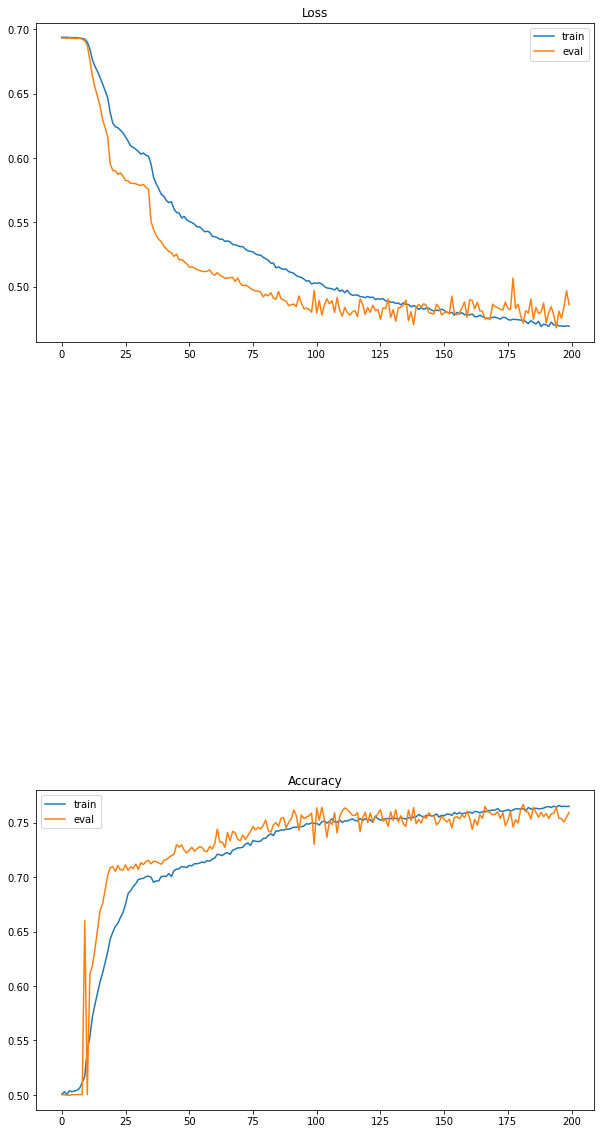

In [16]:
from matplotlib import pyplot
pyplot.figure(figsize=(10, 20))

def draw_acc_loss(history):
  # plot loss during training
  pyplot.subplot(311)
  pyplot.title('Loss')
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='eval')
  pyplot.legend()
  # plot accuracy during training
  pyplot.subplot(313)
  pyplot.title('Accuracy')
  pyplot.plot(history.history['accuracy'], label='train')
  pyplot.plot(history.history['val_accuracy'], label='eval')
  pyplot.legend()
  pyplot.show()

draw_acc_loss(history_DL)

In [ ]:
model_DL.evaluate(X_test, y_test, batch_size=64)

63/63 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.7908


[0.41631659865379333, 0.7907500267028809]